In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('heartdisease.csv')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [ ]:
data['Ca'] = data['Ca'].fillna(data['Ca'].mean())
data['Thal'] = data['Thal'].fillna(data['Thal'].mode()[0])

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


<ipython-input-6-1e8c446b51d3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_rate = data[data['AHD'] == 'Yes'].groupby('AgeGroup').size() / data.groupby('AgeGroup').size() * 100
<ipython-input-6-1e8c446b51d3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_rate = data[data['AHD'] == 'Yes'].groupby('AgeGroup').size() / data.groupby('AgeGroup').size() * 100


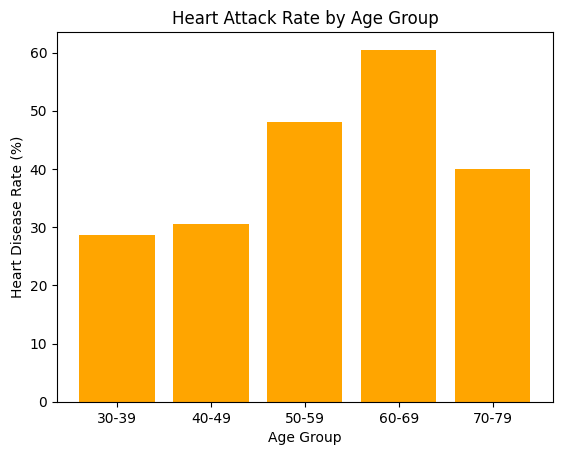

In [ ]:
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Calculate heart disease (AHD = 'Yes') rate by age group
heart_rate = data[data['AHD'] == 'Yes'].groupby('AgeGroup').size() / data.groupby('AgeGroup').size() * 100

plt.bar(heart_rate.index, heart_rate.values, color='orange')
plt.title('Heart Attack Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Rate (%)')
plt.show()

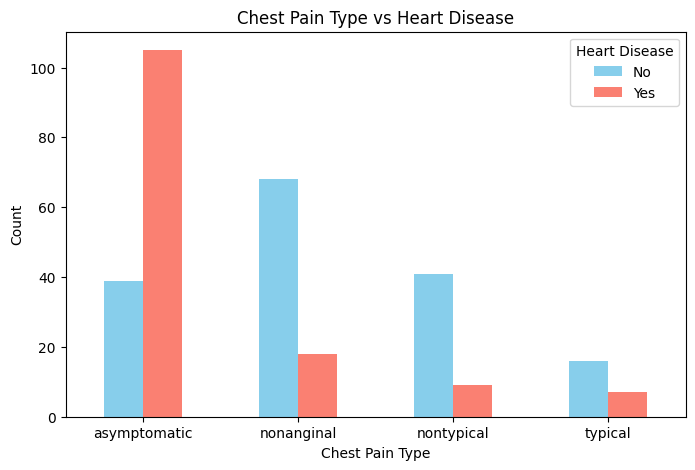

In [ ]:
cp_ahd = pd.crosstab(data['ChestPain'], data['AHD'])
cp_ahd.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=0)
plt.show()

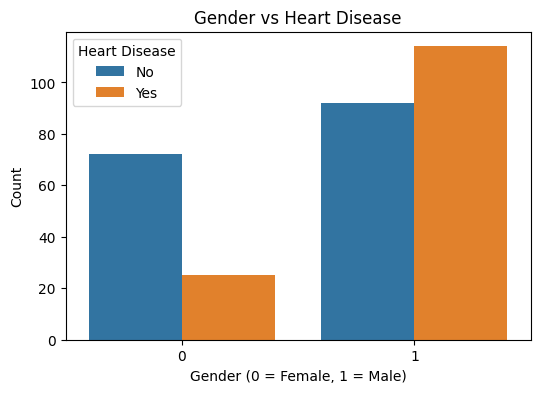

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Sex', hue='AHD')
plt.title('Gender vs Heart Disease')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

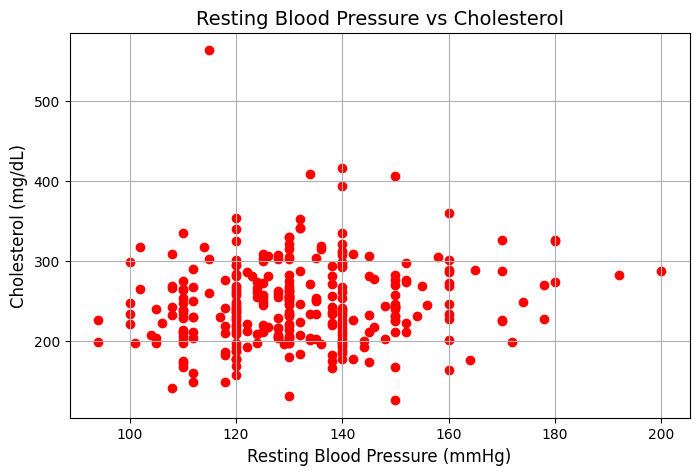

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data['RestBP'], data['Chol'], color='red')
plt.title('Resting Blood Pressure vs Cholesterol', fontsize=14)
plt.xlabel('Resting Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Cholesterol (mg/dL)', fontsize=12)
plt.grid(True)
plt.show()